In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Monthly Orders**: Compare total orders across pre-crisis (Jan–May 2025) vs crisis (Jun–Sep 2025). How severe is the decline?

In [3]:
df_orders=pd.read_csv('fact_cleaned_orders.csv')
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N
...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N


In [4]:
df_orders['order_timestamp'] = pd.to_datetime(df_orders['order_timestamp'])
df_orders['month'] = df_orders['order_timestamp'].dt.strftime('%B')
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January
...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September


In [5]:
df_confirmed_order=df_orders[df_orders['is_cancelled']=='N']
df_confirmed_order

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January
...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,September
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,September
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September


In [6]:
df_grouped_month = df_confirmed_order.groupby('month')['order_id'].count().reset_index()
df_grouped_month.rename(columns={'order_id': 'total_orders'}, inplace=True)
df_grouped_month

,month,total_orders
0,April,20210
1,August,7485
2,February,21272
3,January,22076
4,July,7768
5,June,8219
6,March,22133
7,May,21221
8,September,7670


In [7]:
df_grouped_month['month']=pd.Categorical(df_grouped_month['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [8]:
df_grouped_month

,month,total_orders
0,April,20210
1,August,7485
2,February,21272
3,January,22076
4,July,7768
5,June,8219
6,March,22133
7,May,21221
8,September,7670


In [9]:
df_sorted = df_grouped_month.sort_values(by='month').reset_index(drop=True)
df_sorted

,month,total_orders
0,January,22076
1,February,21272
2,March,22133
3,April,20210
4,May,21221
5,June,8219
6,July,7768
7,August,7485
8,September,7670


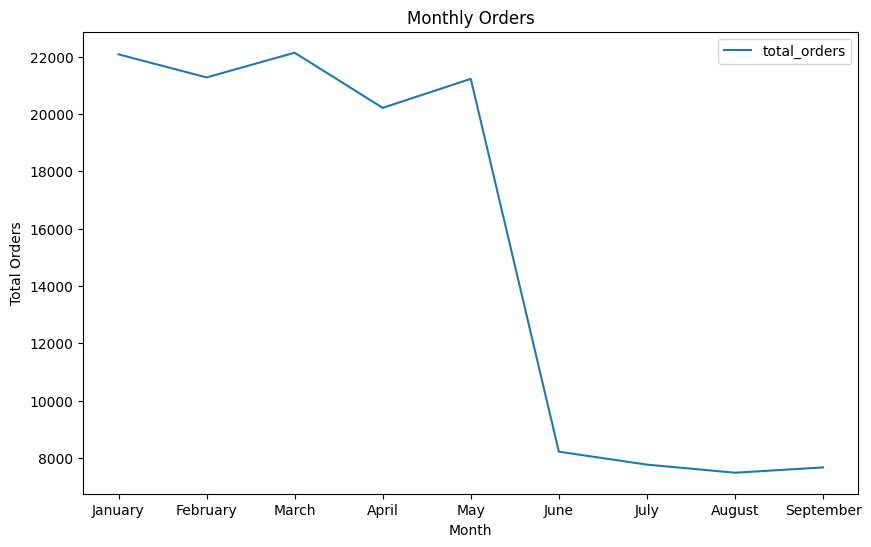

In [10]:
df_sorted.plot(x='month', y='total_orders', kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Monthly Orders')
plt.show()

In [11]:
Crisis=['June', 'July', 'August','September']
df_sorted['Period']=df_sorted['month'].apply(lambda x: 'Crisis' if x in Crisis else 'Pre-Crisis')
df_sorted
df_sorted_period=df_sorted.groupby('Period')['total_orders'].sum().reset_index()
df_sorted_period=df_sorted_period.sort_values(by='total_orders', ascending=False).reset_index(drop=True)
df_sorted_period['Avg_order_month']=df_sorted_period.apply(lambda x: x['total_orders']/5 if x['Period']=='Pre-Crisis'  else x['total_orders']/4 ,axis =1 )
df_sorted_period

,Period,total_orders,Avg_order_month
0,Pre-Crisis,106912,21382.4
1,Crisis,31142,7785.5


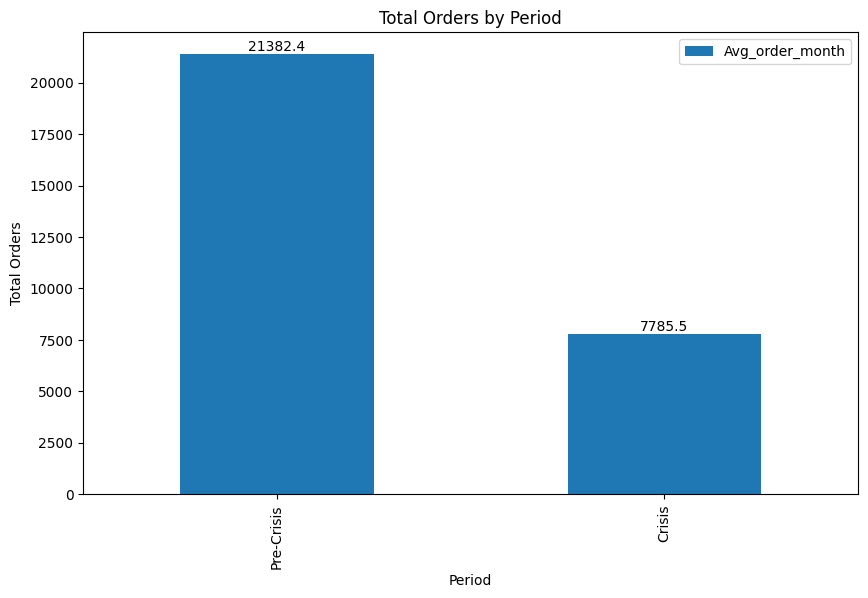

In [12]:
ax = df_sorted_period.plot(x='Period', y='Avg_order_month', kind='bar', figsize=(10, 6))
plt.xlabel('Period')
plt.ylabel('Total Orders')
plt.title('Total Orders by Period')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [13]:
print('The decline % of orders from pre Crisis to Crisis Period is :',round((((df_sorted_period['Avg_order_month'][0]-df_sorted_period['Avg_order_month'][1])/df_sorted_period['Avg_order_month'][0])*100),2),'%')

The decline % of orders from pre Crisis to Crisis Period is : 63.59 %


## **Which** top 5 city groups experienced the highest percentage decline in orders during the crisis period compared to the pre-crisis period?

In [14]:
df_orders['Period'] =df_orders['month'].apply(lambda x: 'Crisis' if x in ['June', 'July', 'August','September'] else 'Pre-Crisis')
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis


In [15]:
df_confirmed_order=df_orders[df_orders['is_cancelled']=='N']
df_confirmed_order

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,September,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,September,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis


In [16]:
df_customer=pd.read_csv('dim_cleaned_customer.csv')
df_customer

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic
...,...,...,...,...
107771,CUST199995,19-11-2024,Delhi,Organic
107772,CUST199996,14-01-2025,Hyderabad,Social
107773,CUST199997,22-12-2024,Hyderabad,Organic
107774,CUST199999,11-05-2025,Mumbai,Organic


In [17]:
df_merged_customer=pd.merge(df_confirmed_order, df_customer, on='customer_id')
df_merged_customer

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period,signup_date,city,acquisition_channel
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis,13-12-2024,Hyderabad,Social
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis,03-11-2024,Bengaluru,Organic
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis,28-12-2024,Kolkata,Organic
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis,08-12-2024,Bengaluru,Organic
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis,11-11-2024,Bengaluru,Social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138049,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,September,Crisis,31-08-2025,Chennai,Organic
138050,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,September,Crisis,17-09-2025,Mumbai,Paid
138051,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis,15-09-2025,Hyderabad,Paid
138052,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis,14-08-2025,Mumbai,Organic


In [18]:
df_grouped_cust=df_merged_customer.groupby(['city','Period'])['order_id'].count().unstack(level='Period')
df_grouped_cust=df_grouped_cust.reset_index()

In [19]:
df_grouped_cust['Decline %']=df_grouped_cust.apply(lambda x: round((((x['Pre-Crisis']-x['Crisis'])/x['Pre-Crisis'])*100),2),axis=1)

In [20]:
df_grouped_cust['Decline ']=df_grouped_cust.apply(lambda x: round((x['Pre-Crisis']-x['Crisis']),2),axis=1)

In [21]:
df_grouped_cust.sort_values(by='Decline ', ascending=False, inplace=True)

In [22]:
df_grouped_cust.reset_index(drop=True, inplace=True)

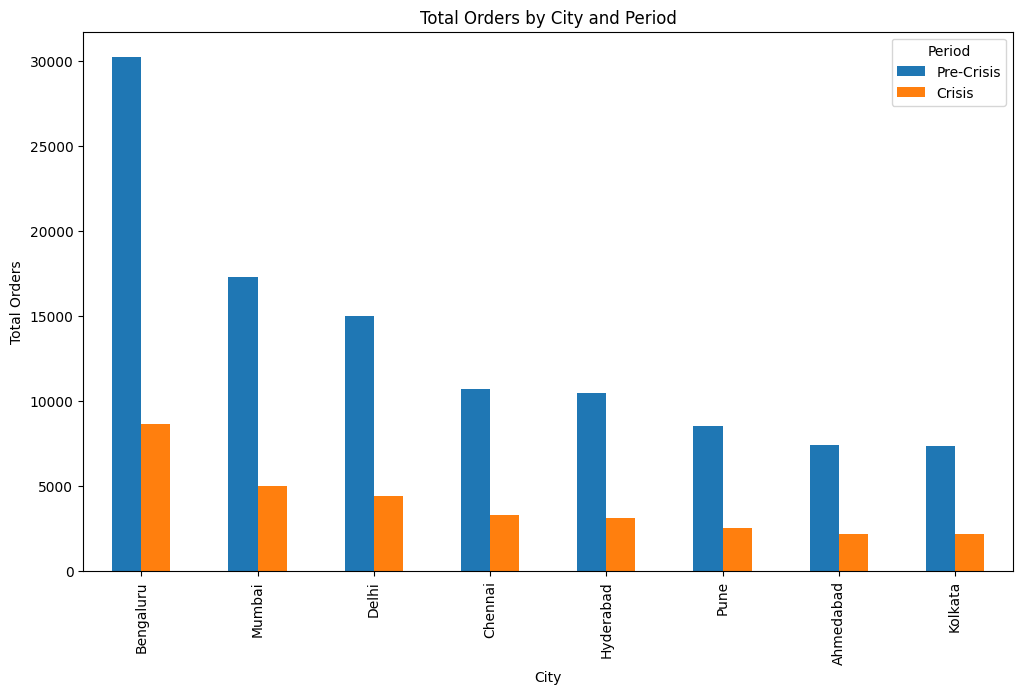

In [23]:
df_grouped_cust.plot(x='city', y=['Pre-Crisis', 'Crisis'], kind='bar', figsize=(12, 7))
plt.xlabel('City')
plt.ylabel('Total Orders')
plt.title('Total Orders by City and Period')
plt.show()

In [24]:
print('Top 5 city with decline during the crisis period compared to the pre-crisis period are:')
df_grouped_cust[['city','Decline ','Decline %']].head(5)

Top 5 city with decline during the crisis period compared to the pre-crisis period are:


Period,city,Decline,Decline %
0,Bengaluru,21578,71.40
1,Mumbai,12307,71.30
2,Delhi,10592,70.62
3,Chennai,7394,69.32
4,Hyderabad,7389,70.50


### **Among restaurants with at least 50 pre-crisis orders, which top 10 high-volume restaurants experienced the largest percentage decline in order counts during the crisis period?**

In [25]:
df_restaurants=pd.read_csv('dim_cleaned_restaurant.csv')
df_restaurants

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...
19990,REST09248,Fresh Sweets Clouds,Chennai,South Indian,Restaurant,16-25,Y
19991,REST11150,Thindi Mane Express Zone,Mumbai,Fast Food,Restaurant,<=15,N
19992,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
19993,REST16252,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [26]:
df_merge_restaurant=pd.merge(df_restaurants,df_confirmed_order,on='restaurant_id')
df_grouped_restaurant=df_merge_restaurant.groupby(['restaurant_name','Period'])['order_id'].count().unstack(level='Period')
df_grouped_restaurant.reset_index(inplace=True)
df_grouped_restaurant=df_grouped_restaurant[df_grouped_restaurant['Pre-Crisis']>50].reset_index(drop=True)
df_grouped_restaurant.sort_values(by='Pre-Crisis', ascending=False, inplace=True)
df_grouped_restaurant

Period,restaurant_name,Crisis,Pre-Crisis
41,Punjabi Express Central,22.0,80.0
7,Classic Tandoor Heaven,17.0,77.0
75,Thindi Mane Pizza Cafe,21.0,73.0
71,Thindi Mane Grill Darbar,20.0,69.0
24,Hot & Crispy Darshini Clouds,15.0,66.0
...,...,...,...
37,Namma Wraps Darbar,14.0,51.0
27,Kolkata Paratha Corner,11.0,51.0
58,Spicy Thali Cafe,9.0,51.0
52,Spicy Express Bhojanalay,9.0,51.0


In [27]:
df_grouped_restaurant['Decline %']=df_grouped_restaurant.apply(lambda x: round((((x['Pre-Crisis']-x['Crisis'])/x['Pre-Crisis'])*100),2),axis=1)
df_grouped_restaurant.sort_values(by='Decline %', ascending=False, inplace=True)
df_grouped_restaurant.reset_index(drop=True, inplace=True)
df_grouped_restaurant.head(10)

Period,restaurant_name,Crisis,Pre-Crisis,Decline %
0,Fresh Tandoor Delight,4.0,54.0,92.59
1,Urban Kitchen Zone,8.0,63.0,87.30
2,Flavours of Tandoor Central,9.0,62.0,85.48
3,Classic Sweets Heaven,8.0,55.0,85.45
4,Grand Cafe Clouds,9.0,60.0,85.00
5,Punjabi Sweets Cafe,9.0,56.0,83.93
6,Hot & Crispy Mess Mahal,9.0,56.0,83.93
7,Thindi Mane Darshini Heaven,9.0,53.0,83.02
8,Punjabi Curry Delight,9.0,53.0,83.02
9,Spicy Express Bhojanalay,9.0,51.0,82.35


## **Cancellation Analysis: What is the cancellation rate trend pre-crisis vs crisis, and which cities are most affected?**

In [28]:
df_cancelled_orders=df_orders.groupby(['Period','is_cancelled'])['order_id'].count().unstack(level='is_cancelled')
df_cancelled_orders.columns.name = None
df_cancelled_orders = df_cancelled_orders.reset_index()
df_cancelled_orders['Cancellation Rate']=df_cancelled_orders.apply(lambda x: round(((x['Y']/(x['N']+x['Y']))*100),2),axis=1)
df_cancelled_orders.rename(columns={'Y': 'Cancelled', 'N': 'Not Cancelled'}, inplace=True)
df_cancelled_orders.rename(columns={'Not Cancelled': 'Confirmed_order'}, inplace=True)

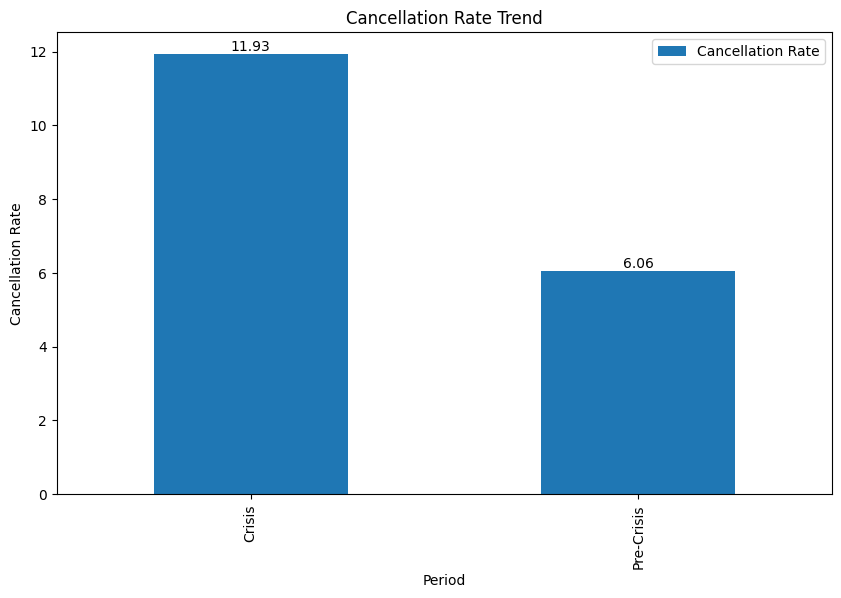

In [29]:
df_plot=df_cancelled_orders[['Period','Cancellation Rate']]
ax=df_plot.plot(x='Period', y='Cancellation Rate', kind='bar', figsize=(10, 6))
plt.xlabel('Period')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate Trend')
for x in ax.patches:
    yval = x.get_height()
    plt.text(x.get_x() + x.get_width()/2., yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [30]:
df_merged_city_orders=pd.merge(df_orders, df_customer, on='customer_id')
df_unstacked_cancelled=df_merged_city_orders.groupby(['city','Period','is_cancelled'])['order_id'].count().unstack(level='is_cancelled')

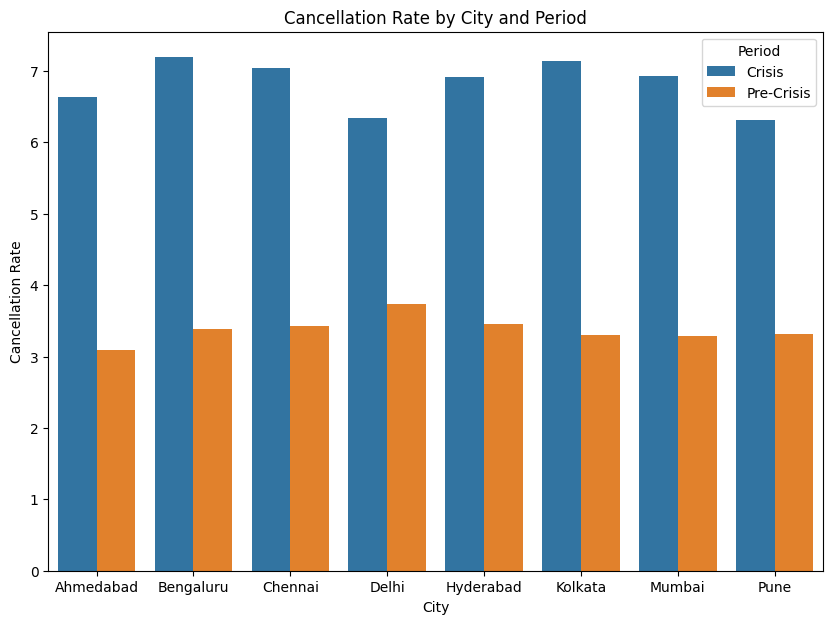

In [31]:
df_unstacked_cancelled['Cancellation Rate']=df_unstacked_cancelled.apply(lambda x: round(((x['Y']/(x['N']+x['Y']))*100),2),axis=1)
plt.figure(figsize=(10, 7))
sns.barplot(x='city', y='Cancellation Rate', hue='Period', data=df_unstacked_cancelled)
plt.xlabel('City')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by City and Period')
plt.show()

In [32]:
df_display=df_unstacked_cancelled.groupby(['city','Period'])['Cancellation Rate'].mean()
df_display

city       Period    
Ahmedabad  Crisis        6.64
           Pre-Crisis    3.09
Bengaluru  Crisis        7.19
           Pre-Crisis    3.38
Chennai    Crisis        7.04
           Pre-Crisis    3.43
Delhi      Crisis        6.34
           Pre-Crisis    3.74
Hyderabad  Crisis        6.92
           Pre-Crisis    3.45
Kolkata    Crisis        7.14
           Pre-Crisis    3.30
Mumbai     Crisis        6.93
           Pre-Crisis    3.29
Pune       Crisis        6.31
           Pre-Crisis    3.32
Name: Cancellation Rate, dtype: float64

## **Delivery SLA: Measure average delivery time across phases.Did SLA compliance worsen significantly in the crisis period?**

In [33]:
df_delivery=pd.read_csv('fact_cleaned_delivery_performance.csv')
df_delivery

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4
...,...,...,...,...
149161,ORD202509003524,72,46,2.2
149162,ORD202509007665,58,38,3.5
149163,ORD202509007687,49,40,6.3
149164,ORD202509002029,50,49,6.8


In [34]:
df_merge_delivery=pd.merge(df_delivery,df_orders,on='order_id')
df_merge_delivery

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,31,31,6.4,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501012051,46,42,1.9,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis
2,ORD202501019281,25,31,6.2,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
3,ORD202501000124,29,41,6.2,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis
4,ORD202501006518,37,41,2.4,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,72,46,2.2,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis
149162,ORD202509007665,58,38,3.5,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September,Crisis
149163,ORD202509007687,49,40,6.3,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis
149164,ORD202509002029,50,49,6.8,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis


In [35]:
df_merge_delivery = df_merge_delivery[df_merge_delivery['is_cancelled']=='N']
df_merge_delivery['Delivery_diff']=df_merge_delivery['expected_delivery_time_mins']-df_merge_delivery['actual_delivery_time_mins']
df_merge_delivery['Abs_error']=df_merge_delivery['Delivery_diff'].abs()
df_merge_delivery['delivery_status']= np.where(df_merge_delivery['Delivery_diff']>=0, 'On Time', 'Late')
df_merge_delivery

/tmp/ipython-input-2130641442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_delivery['Delivery_diff']=df_merge_delivery['expected_delivery_time_mins']-df_merge_delivery['actual_delivery_time_mins']
/tmp/ipython-input-2130641442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_delivery['Abs_error']=df_merge_delivery['Delivery_diff'].abs()
/tmp/ipython-input-2130641442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period,Delivery_diff,Abs_error,delivery_status
0,ORD202501023439,31,31,6.4,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis,0,0,On Time
1,ORD202501012051,46,42,1.9,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis,-4,4,Late
2,ORD202501019281,25,31,6.2,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis,6,6,On Time
3,ORD202501000124,29,41,6.2,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis,12,12,On Time
4,ORD202501006518,37,41,2.4,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis,4,4,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,62,50,6.1,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,September,Crisis,-12,12,Late
149160,ORD202509008087,50,50,2.8,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,September,Crisis,0,0,On Time
149163,ORD202509007687,49,40,6.3,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis,-9,9,Late
149164,ORD202509002029,50,49,6.8,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis,-1,1,Late


In [36]:
a=df_merge_delivery.groupby(['Period','delivery_status'])['order_id'].count().unstack(level='delivery_status')

In [37]:
a['Delay %']=round(((a['Late']/(a['On Time']+a['Late']))*100),2)
a

delivery_status,Late,On Time,Delay %
Period,,,
Crisis,27314,3828,87.71
Pre-Crisis,60289,46623,56.39


Direction


In [38]:

df_merge_delivery.groupby('Period')['Delivery_diff'].mean().round(2)

,Delivery_diff
Period,
Crisis,-17.60
Pre-Crisis,-2.02


In [39]:
display('The Avg Time Delay')
display(df_merge_delivery.groupby('Period')['Abs_error'].mean().round(2))

'The Avg Time Delay'

,Abs_error
Period,
Crisis,18.60
Pre-Crisis,7.39


# **On Time Delivery %**

In [40]:
threshold=10
count_ontime_pre_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Pre-Crisis'].Abs_error<=threshold).sum()
count_ontime_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Crisis'].Abs_error<=threshold).sum()
total_pre_crisis_orders=len(df_merge_delivery[df_merge_delivery['Period']=='Pre-Crisis'])
total_crisis_orders=len(df_merge_delivery[df_merge_delivery['Period']=='Crisis'])
on_time_precrisis_percentage=round((count_ontime_pre_crisis/total_pre_crisis_orders)*100,2)
on_time_crisis_percentage=round((count_ontime_crisis/total_crisis_orders)*100,2)
print('On Time Delivery % during pre-crisis within threshold (10 min) is',on_time_precrisis_percentage,'%')
print('On Time Delivery % during crisis within threshold (10 min) is',on_time_crisis_percentage,'%')

On Time Delivery % during pre-crisis within threshold (10 min) is 73.72 %
On Time Delivery % during crisis within threshold (10 min) is 33.64 %


# **Late Delivery %**

In [41]:
count_delay_pre_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Pre-Crisis'].Delivery_diff<-threshold).sum()
count_delay_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Crisis'].Delivery_diff<-threshold).sum()
delay_precrisis_percentage=round((count_delay_pre_crisis/total_pre_crisis_orders)*100,2)
delay_crisis_percentage=round((count_delay_crisis/total_crisis_orders)*100,2)
print('Late Delivery % during pre-crisis after threshold (10 min) is',delay_precrisis_percentage,'%')
print('Late Delivery % during crisis after threshold (10 min) is',delay_crisis_percentage,'%')

Late Delivery % during pre-crisis after threshold (10 min) is 17.93 %
Late Delivery % during crisis after threshold (10 min) is 66.36 %


# **Early Delivery Rate%(reached super early above threshold)**

In [42]:
count_early_pre_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Pre-Crisis'].Delivery_diff>threshold).sum()
count_early_crisis=(df_merge_delivery[df_merge_delivery['Period']=='Crisis'].Delivery_diff>threshold).sum()
early_precrisis_percentage=round((count_early_pre_crisis/total_pre_crisis_orders)*100,2)
early_crisis_percentage=round((count_early_crisis/total_crisis_orders)*100,2)
print('Early Delivery % during pre-cris is',early_precrisis_percentage,'%')
print('Early Delivery % during crisis is',early_crisis_percentage,'%')

Early Delivery % during pre-cris is 8.36 %
Early Delivery % during crisis is 0.0 %


# **Ratings Fluctuation: Track average customer rating month-by-month. Which months saw the sharpest drop?**

In [43]:
df_ratings=pd.read_csv('fact_cleaned_ratings.csv')

In [44]:
df_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70
...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45


In [45]:
df_merged_ratings=pd.merge(df_ratings,df_orders,on='order_id')
df_avg_ratings=df_merged_ratings.groupby('month')['rating'].mean().round(2)
months=['January','February','March','April','May','June','July','August','September']
df_avg_ratings=df_avg_ratings.reindex(months)
print('The Average Rating MoM is')
display(df_avg_ratings)

The Average Rating MoM is


,rating
month,
January,4.58
February,4.40
March,4.74
April,4.29
May,4.49
June,2.58
July,2.69
August,2.40
September,2.31


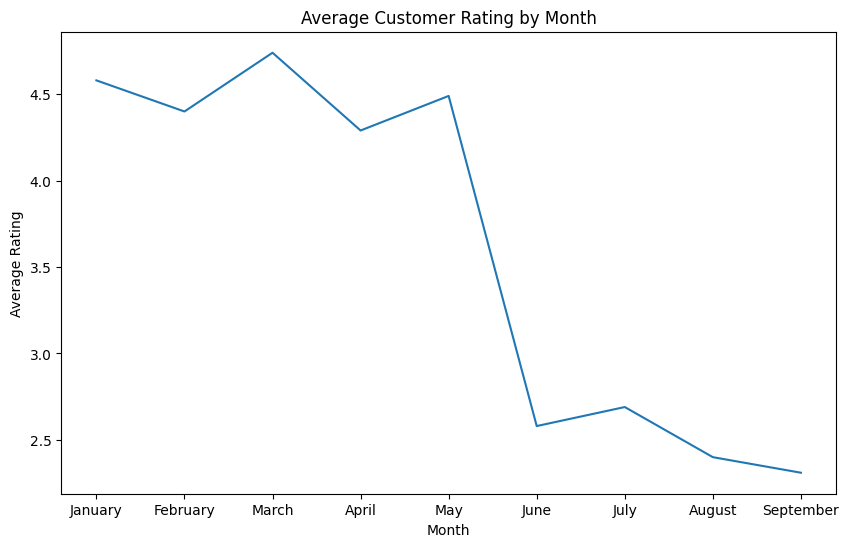

In [46]:
df_avg_ratings.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Customer Rating by Month')
plt.show()

## **Sentiment Insights: During the crisis period, identify the most frequently occurring negative keywords in customer review texts. (Hint: Use a Word Cloud visual in Power BI to visualize the findings.)**

In [47]:
df_crisis_ratings=df_merged_ratings[df_merged_ratings['Period']=='Crisis']
df_crisis_ratings.reset_index(drop=True)

,order_id,customer_id_x,restaurant_id_x,rating,review_text,review_timestamp,sentiment_score,customer_id_y,restaurant_id_y,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202506001517,CUST193107,REST11340,2.8,Not worth the price,01-06-2025 15:01,-0.10,CUST193107,REST11340,DP01565,2025-06-01 12:01:00,209.14,0.00,43.26,252.40,Y,N,June,Crisis
1,ORD202506007403,CUST123608,REST15169,3.1,Portion size smaller than expected,01-06-2025 14:02,0.05,CUST123608,REST15169,DP04516,2025-06-01 12:02:00,301.46,0.00,33.28,334.74,Y,N,June,Crisis
2,ORD202506004081,CUST007063,REST02402,3.4,Food quality is not good,01-06-2025 14:06,0.20,CUST007063,REST02402,DP05831,2025-06-01 12:06:00,301.03,0.00,26.87,327.90,Y,N,June,Crisis
3,ORD202506000821,CUST051578,REST11014,2.3,Not recommended,01-06-2025 15:18,-0.35,CUST051578,REST11014,DP03214,2025-06-01 12:18:00,362.58,0.00,37.90,400.48,Y,N,June,Crisis
4,ORD202506000791,CUST037568,REST02028,2.2,Stale food served,01-06-2025 15:20,-0.40,CUST037568,REST02028,DP06373,2025-06-01 12:20:00,193.37,0.00,43.99,237.36,N,N,June,Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15487,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,CUST057825,REST01490,DP01154,2025-09-30 21:40:00,666.48,0.00,44.82,711.30,N,N,September,Crisis
15488,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,CUST114184,REST16601,DP08374,2025-09-30 21:41:00,126.26,31.54,35.54,130.27,Y,N,September,Crisis
15489,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,CUST173128,REST11207,DP00717,2025-09-30 21:43:00,318.39,63.26,35.83,290.96,Y,N,September,Crisis
15490,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,CUST135098,REST05223,DP06723,2025-09-30 21:57:00,410.78,0.00,20.92,431.70,N,N,September,Crisis


# **Word Cloud Visual using Power BI**

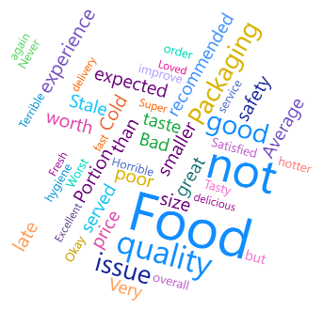

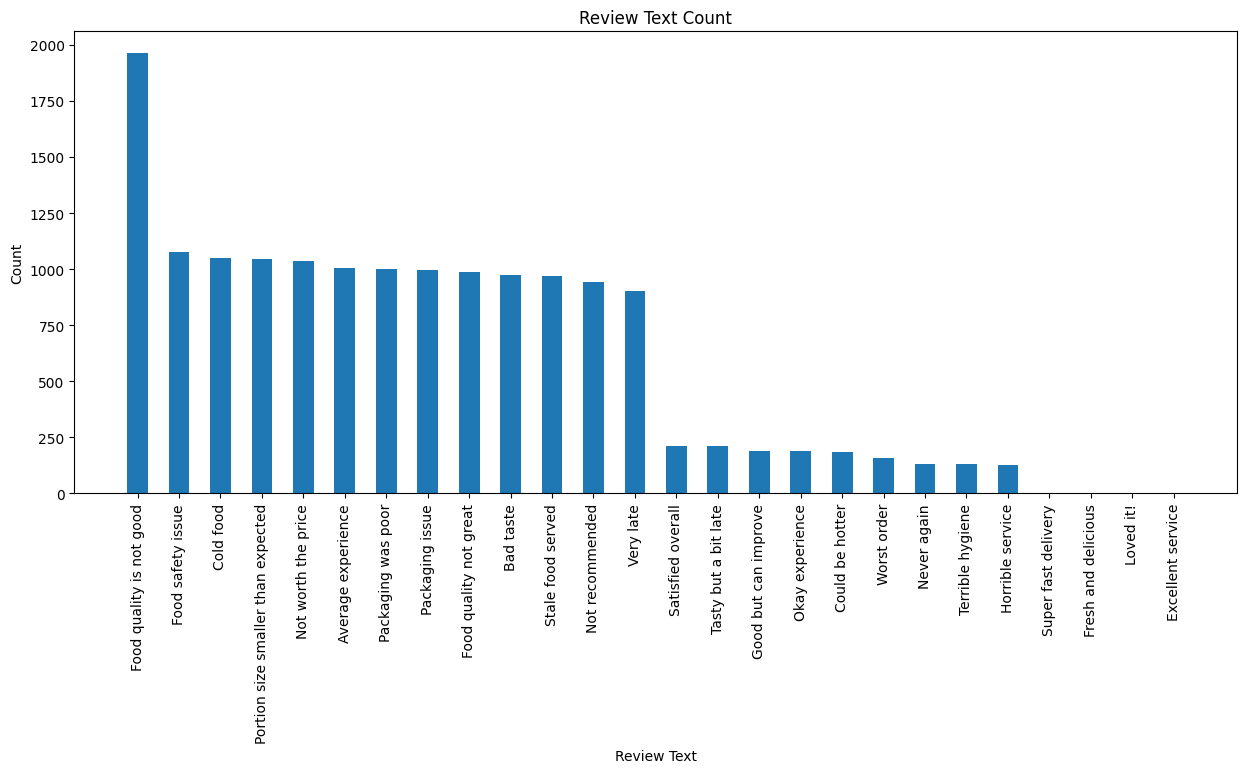

In [48]:
df_keywords_count=df_crisis_ratings.value_counts('review_text')
df_keywords_count.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Review Text')
plt.ylabel('Count')
plt.title('Review Text Count')
plt.autoscale(enable=True, axis='both')
plt.show()

In [49]:
df_keywords_count

,count
review_text,
Food quality is not good,1962
Food safety issue,1076
Cold food,1048
Portion size smaller than expected,1045
Not worth the price,1037
Average experience,1006
Packaging was poor,1001
Packaging issue,997
Food quality not great,989


In [50]:
df_keywords_count.to_csv('df_keywords_count.csv')

## **Revenue Impact: Estimate revenue loss from pre-crisis vs crisis (based on subtotal, discount, and delivery fee).**

In [51]:
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis


In [52]:
df_revenue=df_orders.groupby('Period')[['subtotal_amount','discount_amount','delivery_fee','total_amount']].sum().round(2)
df_revenue.sort_values(by='total_amount', ascending=False, inplace=True)
df_revenue

,subtotal_amount,discount_amount,delivery_fee,total_amount
Period,,,,
Pre-Crisis,36338591.91,2190304.60,3472677.74,37620964.25
Crisis,10555201.30,627678.17,1012628.18,10940151.31


In [53]:
import plotly.express as px

fig = px.bar(df_revenue.reset_index(), x='Period', y=['subtotal_amount', 'discount_amount', 'delivery_fee', 'total_amount'],
             title='Revenue by Period',
             labels={'value': 'Revenue', 'variable': 'Revenue Type'},
             barmode='group')
fig.show()

In [54]:
revenue_loss=round(df_revenue['total_amount'][0]-df_revenue['total_amount'][1],2)
print('Revenue loss from pre-crisis vs crisis is',revenue_loss,'which is',round((revenue_loss/df_revenue['total_amount'][0])*100,2),'%')

Revenue loss from pre-crisis vs crisis is 26680812.94 which is 70.92 %


/tmp/ipython-input-1838731011.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1838731011.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### **Loyalty Impact: Among customers who placed five or more orders before the crisis, determine how many stopped ordering during the crisis, and out of those how many had an average rating above 4.5?**

In [55]:
df_grouped_cust=df_orders.groupby(['Period','customer_id'])['order_id'].count()
df_grouped_cust=df_grouped_cust.rename('total_orders')
df_grouped_cust=df_grouped_cust.reset_index()
df_grouped_cust_precrisis=df_grouped_cust[df_grouped_cust['Period']=='Pre-Crisis']
df_grouped_cust_precrisis=df_grouped_cust_precrisis[df_grouped_cust_precrisis['total_orders']>=5]
cnt_precrisis=df_grouped_cust_precrisis['customer_id'].count()
print('Users placed 5 or more than 5 orders before the crisis are',cnt_precrisis)

Users placed 5 or more than 5 orders before the crisis are 58


In [56]:
df_grouped_cust_crisis=df_grouped_cust[df_grouped_cust['Period']=='Crisis']
df_grouped_cust_crisis=df_grouped_cust_crisis[df_grouped_cust_crisis['customer_id'].isin(df_grouped_cust_precrisis['customer_id'])]


# **Still ordering**

In [57]:
stopped_order=df_grouped_cust_precrisis[~df_grouped_cust_precrisis['customer_id'].isin(df_grouped_cust_crisis['customer_id'])]['customer_id'].reset_index(drop=True)

In [58]:
still_ordering=df_grouped_cust_crisis['customer_id'].count()
print('Users stopped ordering after crisis are',cnt_precrisis-still_ordering)

Users stopped ordering after crisis are 49


In [59]:
df_stopped_rating=pd.merge(stopped_order,df_ratings,on='customer_id')
df_stopped_rating=df_stopped_rating.groupby('customer_id')['rating'].mean().round(2)
count_high_rating_stopped = df_stopped_rating[df_stopped_rating > 4.5].count()
print('Number of users who stopped ordering and had an average rating above 4.5:', count_high_rating_stopped)

Number of users who stopped ordering and had an average rating above 4.5: 26


In [60]:
high_rating=pd.merge(df_grouped_cust_precrisis,df_ratings,on='customer_id')
a=high_rating.groupby('customer_id')['rating'].mean().round(2)
count_high_rating = a[a > 4.5].count()
print('Number of users who had an average rating above 4.5 with 5 or more than 5 orders:', count_high_rating)

Number of users who had an average rating above 4.5 with 5 or more than 5 orders: 28


### **Customer Lifetime Decline: Which high-value customers (top 5% by total spend before the crisis) showed the largest drop in order frequency and ratings during the crisis? What common patterns (e.g location, cuisine preference,delivery delays) do they share?**

In [61]:
df_value=df_confirmed_order.groupby(['customer_id','Period'])['total_amount'].sum()
df_value=df_value.unstack(level='Period')
df_value.fillna(0, inplace=True)
df_value.reset_index(inplace=True)
df_value_precrisis=df_value[['customer_id','Pre-Crisis','Crisis']]
df_value_precrisis.rename(columns={'Pre-Crisis': 'total_Spent_precrisis','Crisis':'total_spent_crisis'}, inplace=True)
df_value_precrisis

Period,customer_id,total_Spent_precrisis,total_spent_crisis
0,CUST000007,239.39,0.00
1,CUST000008,246.05,0.00
2,CUST000009,331.13,652.69
3,CUST000010,652.08,0.00
4,CUST000011,146.56,0.00
...,...,...,...
99785,CUST199995,216.68,0.00
99786,CUST199996,366.30,0.00
99787,CUST199997,556.69,0.00
99788,CUST199999,334.26,0.00


In [62]:
df_value_precrisis.sort_values(by='total_Spent_precrisis', ascending=False, inplace=True)
df_value_precrisis.reset_index(drop=True, inplace=True)
# Calculate the threshold for the top 5% of customers by total spend
top_5_percent_threshold = df_value_precrisis['total_Spent_precrisis'].quantile(0.95)
df_value_precrisis = df_value_precrisis[df_value_precrisis['total_Spent_precrisis'] >= top_5_percent_threshold]
df_value_precrisis

Period,customer_id,total_Spent_precrisis,total_spent_crisis
0,CUST077722,2715.18,0.00
1,CUST179266,2404.06,0.00
2,CUST125990,2403.16,0.00
3,CUST163628,2397.58,0.00
4,CUST165515,2349.96,0.00
...,...,...,...
4985,CUST071318,893.59,0.00
4986,CUST058626,893.48,0.00
4987,CUST012528,893.46,294.64
4988,CUST122678,893.44,0.00


In [63]:
df_order_count_period=df_confirmed_order.groupby(['customer_id','Period'])['order_id'].count()
df_order_count_period=df_order_count_period.unstack(level='Period')
df_order_count_period.fillna(0, inplace=True)
df_order_count_period.reset_index(inplace=True)
df_order_count_period

Period,customer_id,Crisis,Pre-Crisis
0,CUST000007,0.0,1.0
1,CUST000008,0.0,1.0
2,CUST000009,2.0,1.0
3,CUST000010,0.0,3.0
4,CUST000011,0.0,1.0
...,...,...,...
99785,CUST199995,0.0,1.0
99786,CUST199996,0.0,1.0
99787,CUST199997,0.0,1.0
99788,CUST199999,0.0,1.0


In [64]:
df_order_count_period=df_order_count_period[['customer_id','Pre-Crisis','Crisis']]
df_order_count_period

Period,customer_id,Pre-Crisis,Crisis
0,CUST000007,1.0,0.0
1,CUST000008,1.0,0.0
2,CUST000009,1.0,2.0
3,CUST000010,3.0,0.0
4,CUST000011,1.0,0.0
...,...,...,...
99785,CUST199995,1.0,0.0
99786,CUST199996,1.0,0.0
99787,CUST199997,1.0,0.0
99788,CUST199999,1.0,0.0


**Customers Stopped ordering but was valuable customer**

In [65]:
df_value_cust_freq=pd.merge(df_value_precrisis,df_order_count_period,on='customer_id')
df_stop_order=df_value_cust_freq[df_value_cust_freq['Crisis']==0]
df_stop_order

Period,customer_id,total_Spent_precrisis,total_spent_crisis,Pre-Crisis,Crisis
0,CUST077722,2715.18,0.0,5.0,0.0
1,CUST179266,2404.06,0.0,5.0,0.0
2,CUST125990,2403.16,0.0,5.0,0.0
3,CUST163628,2397.58,0.0,5.0,0.0
4,CUST165515,2349.96,0.0,5.0,0.0
...,...,...,...,...,...
4984,CUST055715,893.62,0.0,3.0,0.0
4985,CUST071318,893.59,0.0,3.0,0.0
4986,CUST058626,893.48,0.0,2.0,0.0
4988,CUST122678,893.44,0.0,3.0,0.0


**Customers frequency has reduced significantly and also AOV**

In [66]:
df_value_cust_freq=pd.merge(df_value_precrisis,df_order_count_period,on='customer_id')
df_value_cust_freq[df_value_cust_freq['Crisis']!=0]

Period,customer_id,total_Spent_precrisis,total_spent_crisis,Pre-Crisis,Crisis
8,CUST133600,2189.70,307.40,4.0,1.0
17,CUST146179,2016.34,510.06,5.0,1.0
19,CUST199282,2000.50,375.66,4.0,1.0
24,CUST077309,1949.72,541.56,3.0,1.0
29,CUST197169,1920.34,282.53,5.0,1.0
...,...,...,...,...,...
4966,CUST043214,894.46,398.28,2.0,1.0
4972,CUST115121,894.16,251.11,2.0,1.0
4977,CUST141105,893.91,213.20,2.0,1.0
4982,CUST150433,893.70,248.80,2.0,1.0


In [67]:
df_value_cust_freq

Period,customer_id,total_Spent_precrisis,total_spent_crisis,Pre-Crisis,Crisis
0,CUST077722,2715.18,0.00,5.0,0.0
1,CUST179266,2404.06,0.00,5.0,0.0
2,CUST125990,2403.16,0.00,5.0,0.0
3,CUST163628,2397.58,0.00,5.0,0.0
4,CUST165515,2349.96,0.00,5.0,0.0
...,...,...,...,...,...
4985,CUST071318,893.59,0.00,3.0,0.0
4986,CUST058626,893.48,0.00,2.0,0.0
4987,CUST012528,893.46,294.64,1.0,1.0
4988,CUST122678,893.44,0.00,3.0,0.0


In [68]:
df_cuisine=pd.merge(df_orders,df_restaurants,on='restaurant_id')
df_cuisine=df_cuisine[df_cuisine['Period']=='Pre-Crisis']
df_cuisine=df_cuisine[['customer_id','restaurant_id','restaurant_name','city','cuisine_type','partner_type','is_active']]

In [69]:
df_top_cuisine = df_cuisine.groupby('customer_id')['cuisine_type'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'No Preference'
).reset_index()

df_top_cuisine.columns = ['customer_id', 'Top_Cuisine_Preference']
print(df_top_cuisine)

      customer_id Top_Cuisine_Preference
0      CUST000007                Healthy
1      CUST000008               Desserts
2      CUST000009                Biryani
3      CUST000010                Chinese
4      CUST000011                Chinese
...           ...                    ...
86819  CUST199995               Desserts
86820  CUST199996           North Indian
86821  CUST199997           North Indian
86822  CUST199999                Biryani
86823  CUST200000           South Indian

[86824 rows x 2 columns]


In [70]:
df_cuisine_preference=pd.merge(df_value_cust_freq,df_top_cuisine,on='customer_id')
df_cuisine_preference.rename(columns={'Pre-Crisis':'order_vol_precrisis','Crisis':'order_vol_crisis'},inplace=True)
df_cuisine_preference

,customer_id,total_Spent_precrisis,total_spent_crisis,order_vol_precrisis,order_vol_crisis,Top_Cuisine_Preference
0,CUST077722,2715.18,0.00,5.0,0.0,North Indian
1,CUST179266,2404.06,0.00,5.0,0.0,Healthy
2,CUST125990,2403.16,0.00,5.0,0.0,Biryani
3,CUST163628,2397.58,0.00,5.0,0.0,South Indian
4,CUST165515,2349.96,0.00,5.0,0.0,Chinese
...,...,...,...,...,...,...
4985,CUST071318,893.59,0.00,3.0,0.0,Biryani
4986,CUST058626,893.48,0.00,2.0,0.0,Fast Food
4987,CUST012528,893.46,294.64,1.0,1.0,North Indian
4988,CUST122678,893.44,0.00,3.0,0.0,Biryani


**Need to audit Biryani Chinese and North Indian cuisine restaurants (City focused -Hyderabad,Chennai,Delhi,Mumbai,Bengaluru) Majorly Tier 1 cities{70%}**

In [71]:
print('The count of High LTV churned User City Wise')
display(pd.merge(df_cuisine_preference[df_cuisine_preference['order_vol_crisis']==0],df_cuisine,on='customer_id').value_counts('city'))

The count of High LTV churned User City Wise


,count
city,
Bengaluru,2726
Mumbai,1755
Delhi,1738
Chennai,1158
Hyderabad,1124
Kolkata,1060
Ahmedabad,940
Pune,901


In [72]:
print("The Top cuisine Prefernce of High LTV churned User")
display(df_cuisine_preference[df_cuisine_preference['order_vol_crisis']==0].value_counts('Top_Cuisine_Preference'))

The Top cuisine Prefernce of High LTV churned User


,count
Top_Cuisine_Preference,
Biryani,1327
Chinese,970
North Indian,603
Desserts,408
Fast Food,369
Pizza,232
South Indian,215
Healthy,164


In [73]:
df_rating_drop=df_merged_ratings.groupby(by=['customer_id_x','Period'])['rating'].mean().unstack(level='Period')
df_rating_drop.fillna(0, inplace=True)
df_rating_drop.reset_index(inplace=True)
df_rating_drop.rename(columns={'customer_id_x': 'customer_id'}, inplace=True)


In [74]:
df_rating_drop.rename(columns={'Pre-Crisis': 'rating_precrisis','Crisis':'rating_crisis'}, inplace=True)
df_rating_drop

Period,customer_id,rating_crisis,rating_precrisis
0,CUST000007,0.0,5.0
1,CUST000010,0.0,4.1
2,CUST000014,3.0,0.0
3,CUST000017,0.0,4.9
4,CUST000019,0.0,4.9
...,...,...,...
58187,CUST199992,0.0,4.3
58188,CUST199993,0.0,4.7
58189,CUST199997,0.0,4.8
58190,CUST199999,0.0,4.5


In [75]:
df_cus=pd.merge(df_cuisine_preference,df_rating_drop,on='customer_id')
df_cus

,customer_id,total_Spent_precrisis,total_spent_crisis,order_vol_precrisis,order_vol_crisis,Top_Cuisine_Preference,rating_crisis,rating_precrisis
0,CUST077722,2715.18,0.00,5.0,0.0,North Indian,0.0,4.40
1,CUST179266,2404.06,0.00,5.0,0.0,Healthy,0.0,4.60
2,CUST125990,2403.16,0.00,5.0,0.0,Biryani,0.0,4.70
3,CUST163628,2397.58,0.00,5.0,0.0,South Indian,0.0,4.75
4,CUST165515,2349.96,0.00,5.0,0.0,Chinese,0.0,4.95
...,...,...,...,...,...,...,...,...
4160,CUST055715,893.62,0.00,3.0,0.0,Biryani,0.0,4.65
4161,CUST071318,893.59,0.00,3.0,0.0,Biryani,0.0,4.45
4162,CUST012528,893.46,294.64,1.0,1.0,North Indian,2.8,0.00
4163,CUST122678,893.44,0.00,3.0,0.0,Biryani,0.0,4.50


In [76]:
df_cus=df_cus[(df_cus['rating_crisis']!=0 )&(df_cus['rating_precrisis']!=0)]
print('Top ordered Cuisine by retained High LTV customers where review was extremely low ')
display(df_cus[df_cus['rating_crisis']<df_cus['rating_precrisis']].value_counts('Top_Cuisine_Preference'))
display(df_cus[df_cus['rating_crisis']<df_cus['rating_precrisis']])

Top ordered Cuisine by retained High LTV customers where review was extremely low 


,count
Top_Cuisine_Preference,
Biryani,91
Chinese,65
North Indian,43
Desserts,31
Fast Food,24
South Indian,16
Healthy,13
Pizza,12


,customer_id,total_Spent_precrisis,total_spent_crisis,order_vol_precrisis,order_vol_crisis,Top_Cuisine_Preference,rating_crisis,rating_precrisis
8,CUST133600,2189.70,307.40,4.0,1.0,North Indian,2.9,4.150000
17,CUST146179,2016.34,510.06,5.0,1.0,North Indian,2.6,4.166667
19,CUST199282,2000.50,375.66,4.0,1.0,North Indian,3.2,4.550000
24,CUST077309,1949.72,541.56,3.0,1.0,North Indian,3.0,4.550000
29,CUST197169,1920.34,282.53,5.0,1.0,North Indian,2.5,4.250000
...,...,...,...,...,...,...,...,...
4101,CUST109658,896.53,280.69,2.0,1.0,North Indian,1.2,5.000000
4129,CUST119371,895.46,272.24,2.0,1.0,Chinese,3.1,4.400000
4145,CUST043214,894.46,398.28,2.0,1.0,Desserts,2.9,3.800000
4150,CUST115121,894.16,251.11,2.0,1.0,Biryani,2.0,4.600000


In [77]:
df_merged_ratings.rename(columns={'customer_id_x': 'customer_id'}, inplace=True)
df_merged_ratings

,order_id,customer_id,restaurant_id_x,rating,review_text,review_timestamp,sentiment_score,customer_id_y,restaurant_id_y,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,CUST093042,REST13907,DP01276,2025-01-01 12:03:00,300.30,48.31,31.41,283.40,N,N,January,Pre-Crisis
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,CUST110825,REST08451,DP03817,2025-01-01 12:06:00,164.43,34.19,40.57,170.81,Y,N,January,Pre-Crisis
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,CUST181669,REST00225,DP11899,2025-01-01 12:06:00,362.00,0.00,33.33,395.33,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,CUST057825,REST01490,DP01154,2025-09-30 21:40:00,666.48,0.00,44.82,711.30,N,N,September,Crisis
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,CUST114184,REST16601,DP08374,2025-09-30 21:41:00,126.26,31.54,35.54,130.27,Y,N,September,Crisis
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,CUST173128,REST11207,DP00717,2025-09-30 21:43:00,318.39,63.26,35.83,290.96,Y,N,September,Crisis
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,CUST135098,REST05223,DP06723,2025-09-30 21:57:00,410.78,0.00,20.92,431.70,N,N,September,Crisis


In [78]:

we=pd.merge(df_cus,df_merged_ratings[df_merged_ratings['Period']=='Crisis'],on='customer_id')
we=we[['customer_id','Top_Cuisine_Preference','rating_precrisis','rating_crisis','review_text','order_vol_precrisis','order_vol_crisis']]
display('Most common review during crisis by high LTV retained customers')
we['review_text'].value_counts()

'Most common review during crisis by high LTV retained customers'

,count
review_text,
Food quality is not good,41
Food safety issue,24
Not worth the price,22
Food quality not great,22
Average experience,21
Packaging was poor,21
Not recommended,21
Packaging issue,21
Bad taste,20


In [79]:
df_sent=df_merged_ratings.groupby(by=['customer_id','Period'])['sentiment_score'].mean().unstack(level='Period')
df_sent.fillna(0, inplace=True)
df_sent.reset_index(inplace=True)
df_sent.rename(columns={'customer_id_x': 'customer_id','Crisis':'Sent_score_Crisis','Pre-Crisis':'Sent_score_Pre-Crisis'}, inplace=True)
df_sent

Period,customer_id,Sent_score_Crisis,Sent_score_Pre-Crisis
0,CUST000007,0.0,1.00
1,CUST000010,0.0,0.55
2,CUST000014,0.0,0.00
3,CUST000017,0.0,0.95
4,CUST000019,0.0,0.95
...,...,...,...
58187,CUST199992,0.0,0.65
58188,CUST199993,0.0,0.85
58189,CUST199997,0.0,0.90
58190,CUST199999,0.0,0.75


## **They have negative Comments and have faced lots of problem**

In [80]:
print('Sentiment')
print(df_sent[(df_sent['Sent_score_Crisis']<0)&(df_sent['Sent_score_Pre-Crisis']>0)])

Sentiment
Period customer_id  Sent_score_Crisis  Sent_score_Pre-Crisis
42      CUST000151             -0.050                   0.65
58      CUST000203             -0.150                   1.00
120     CUST000418             -0.275                   0.65
142     CUST000475             -0.400                   0.55
177     CUST000609             -0.250                   0.75
...            ...                ...                    ...
58121   CUST199825             -0.400                   0.60
58123   CUST199830             -0.650                   0.70
58142   CUST199879             -0.350                   0.95
58145   CUST199888             -0.200                   0.85
58180   CUST199966             -0.200                   0.85

[2692 rows x 3 columns]


In [81]:
cust_seg=pd.merge(df_cus,df_sent,on='customer_id')
cust_seg=cust_seg[['customer_id','Top_Cuisine_Preference','rating_precrisis','rating_crisis','Sent_score_Pre-Crisis','Sent_score_Crisis']]
print("The avg sentimental score of High LTV retained customer ")
display(cust_seg)
neg_cust_seg=cust_seg[cust_seg['Sent_score_Crisis']<0]
print("The avg sentimental score of High LTV retained customer who have +ve score during pre-crisis but have -ve score during crisis")
display(neg_cust_seg)

The avg sentimental score of High LTV retained customer 


,customer_id,Top_Cuisine_Preference,rating_precrisis,rating_crisis,Sent_score_Pre-Crisis,Sent_score_Crisis
0,CUST133600,North Indian,4.150000,2.9,0.575000,-0.05
1,CUST146179,North Indian,4.166667,2.6,0.583333,-0.20
2,CUST199282,North Indian,4.550000,3.2,0.775000,0.10
3,CUST077309,North Indian,4.550000,3.0,0.775000,0.00
4,CUST197169,North Indian,4.250000,2.5,0.625000,-0.25
...,...,...,...,...,...,...
290,CUST109658,North Indian,5.000000,1.2,1.000000,-0.90
291,CUST119371,Chinese,4.400000,3.1,0.700000,0.05
292,CUST043214,Desserts,3.800000,2.9,0.400000,-0.05
293,CUST115121,Biryani,4.600000,2.0,0.800000,-0.50


The avg sentimental score of High LTV retained customer who have +ve score during pre-crisis but have -ve score during crisis


,customer_id,Top_Cuisine_Preference,rating_precrisis,rating_crisis,Sent_score_Pre-Crisis,Sent_score_Crisis
0,CUST133600,North Indian,4.150000,2.9,0.575000,-0.05
1,CUST146179,North Indian,4.166667,2.6,0.583333,-0.20
4,CUST197169,North Indian,4.250000,2.5,0.625000,-0.25
5,CUST155346,Biryani,4.400000,2.9,0.700000,-0.05
6,CUST192705,Pizza,4.600000,2.5,0.800000,-0.25
...,...,...,...,...,...,...
289,CUST174972,Chinese,4.800000,2.1,0.900000,-0.45
290,CUST109658,North Indian,5.000000,1.2,1.000000,-0.90
292,CUST043214,Desserts,3.800000,2.9,0.400000,-0.05
293,CUST115121,Biryani,4.600000,2.0,0.800000,-0.50


**Easily recoverable customer**

In [82]:
df_sent[(df_sent['Sent_score_Crisis']>0)&(df_sent['Sent_score_Pre-Crisis']>0)]

Period,customer_id,Sent_score_Crisis,Sent_score_Pre-Crisis
74,CUST000269,0.40,0.700
181,CUST000620,0.50,0.800
190,CUST000652,0.40,0.750
195,CUST000667,0.40,0.850
200,CUST000698,0.10,0.350
...,...,...,...
57629,CUST198073,0.05,0.775
57686,CUST198251,0.20,0.950
57843,CUST198815,0.15,0.750
57852,CUST198836,0.30,0.800


In [83]:
df_delivery

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4
...,...,...,...,...
149161,ORD202509003524,72,46,2.2
149162,ORD202509007665,58,38,3.5
149163,ORD202509007687,49,40,6.3
149164,ORD202509002029,50,49,6.8


In [84]:
df_delivery_partner=pd.read_csv('dim_cleaned_delivery_partner.csv')
df_delivery_partner

,delivery_partner_id,partner_name,city,vehicle_type,employment_type,avg_rating,is_active
0,DP09615,Neha E,Bengaluru,Scooter,Full-time,3.77,Y
1,DP02021,Neha V,Bengaluru,Bike,Full-time,3.90,Y
2,DP05541,Vikas S,Delhi,Cycle,Part-time,3.33,Y
3,DP13859,Amit B,Delhi,Cycle,Part-time,4.07,N
4,DP08091,Arjun R,Mumbai,Car,Full-time,4.63,Y
...,...,...,...,...,...,...,...
14995,DP05518,Neha W,Pune,Bike,Part-time,3.96,N
14996,DP01199,Shreya J,Chennai,Bike,Full-time,4.14,Y
14997,DP07045,Suresh M,Delhi,Bike,Full-time,4.45,Y
14998,DP09075,Vikas H,Chennai,Scooter,Full-time,4.46,Y


In [85]:
df_delivery_partner[df_delivery_partner['is_active']=='N'].describe()

,avg_rating
count,1765.000000
mean,4.186312
std,0.300242
min,3.190000
25%,3.980000
50%,4.180000
75%,4.400000
max,5.000000


In [89]:
ab=pd.merge(a,b,on='city')
ab['retained_pct']=(ab.left/(ab.active_people+ab.left))*100
ab

,active_people,left,retained_pct
city,,,
Ahmedabad,1068,144,11.881188
Bengaluru,3334,441,11.682119
Chennai,1378,181,11.610006
Delhi,1955,252,11.418215
Hyderabad,1275,170,11.764706
Kolkata,1200,182,13.169320
Mumbai,1979,248,11.136057
Pune,1046,147,12.321878


In [90]:
df_delivery_partner[df_delivery_partner['is_active']=='Y'].describe()

,avg_rating
count,13235.000000
mean,4.199047
std,0.300550
min,3.060000
25%,4.000000
50%,4.200000
75%,4.400000
max,5.000000


In [88]:
b=df_delivery_partner[df_delivery_partner['is_active']=='N'].groupby('city')['delivery_partner_id'].count()
b.name='left'
b

,left
city,
Ahmedabad,144
Bengaluru,441
Chennai,181
Delhi,252
Hyderabad,170
Kolkata,182
Mumbai,248
Pune,147


In [87]:
a=df_delivery_partner[df_delivery_partner['is_active']=='Y'].groupby('city')['delivery_partner_id'].count()
a.name='active_people'
a

,active_people
city,
Ahmedabad,1068
Bengaluru,3334
Chennai,1378
Delhi,1955
Hyderabad,1275
Kolkata,1200
Mumbai,1979
Pune,1046


In [91]:
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis


In [92]:
conditions = [
    df_orders['order_timestamp'].dt.month <= 3, # Q1: January, February, March
    (df_orders['order_timestamp'].dt.month > 3) & (df_orders['order_timestamp'].dt.month <= 6), # Q2: April, May, June
    (df_orders['order_timestamp'].dt.month > 6) & (df_orders['order_timestamp'].dt.month <= 9)  # Q3: July, August, September
]
choices = ['Q1', 'Q2', 'Q3']
df_orders['Quarter'] = np.select(conditions, choices, default='Unknown')
display(df_orders.head())

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period,Quarter
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis,Q1
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis,Q1
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis,Q1
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis,Q1
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis,Q1


# **EDA-11 |Churned Restaurant Analysis**

In [93]:
df_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period,Quarter
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,January,Pre-Crisis,Q1
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,January,Pre-Crisis,Q1
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,January,Pre-Crisis,Q1
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,January,Pre-Crisis,Q1
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis,Q3
149162,ORD202509007665,CUST014106,REST04052,Not_available,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,September,Crisis,Q3
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,September,Crisis,Q3
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,September,Crisis,Q3


In [96]:
df_merge_restaurants=pd.merge(df_orders,df_restaurants,on='restaurant_id')
df_churn_restaurants=df_merge_restaurants[df_merge_restaurants['is_active']=='N']
df_churn_restaurants

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,Period,Quarter,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,January,Pre-Crisis,Q1,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
6,ORD202501004299,CUST107475,REST12542,DP07728,2025-01-01 12:02:00,206.41,0.00,30.62,237.03,Y,N,January,Pre-Crisis,Q1,Sri Darshini Hub,Bengaluru,Fast Food,Restaurant,16-25,N
21,ORD202501000545,CUST121709,REST09769,DP14443,2025-01-01 12:13:00,352.01,0.00,21.46,373.47,N,N,January,Pre-Crisis,Q1,Namma Kitchen Clouds,Chennai,Biryani,Restaurant,16-25,N
34,ORD202501018102,CUST015556,REST14521,DP09794,2025-01-01 12:20:00,278.23,15.32,44.24,307.15,N,N,January,Pre-Crisis,Q1,Namma Delights Bhojanalay,Hyderabad,Healthy,Restaurant,>40,N
37,ORD202501008903,CUST035954,REST19821,DP02395,2025-01-01 12:22:00,265.64,0.00,41.22,306.86,Y,N,January,Pre-Crisis,Q1,Classic Kitchen Point,Kolkata,Fast Food,Restaurant,26-40,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149110,ORD202509009077,CUST024731,REST10666,Not_available,2025-09-30 21:11:00,0.00,0.00,0.00,0.00,N,Y,September,Crisis,Q3,Kolkata Sweets Zone,Bengaluru,Desserts,Restaurant,16-25,N
149126,ORD202509009609,CUST057825,REST01490,DP01154,2025-09-30 21:40:00,666.48,0.00,44.82,711.30,N,N,September,Crisis,Q3,Classic Sweets Delight,Kolkata,South Indian,Cloud Kitchen,16-25,N
149153,ORD202509005267,CUST178860,REST03744,DP08931,2025-09-30 22:32:00,241.24,0.00,20.31,261.56,N,N,September,Crisis,Q3,Grand Thali Cafe,Mumbai,South Indian,Restaurant,16-25,N
149155,ORD202509009433,CUST026652,REST12044,DP05866,2025-09-30 22:37:00,199.05,0.00,32.50,231.55,N,N,September,Crisis,Q3,Madras Cafe Heaven,Ahmedabad,Fast Food,Cloud Kitchen,26-40,N


Text(0.5, 1.0, 'Churned Restaurants by City')

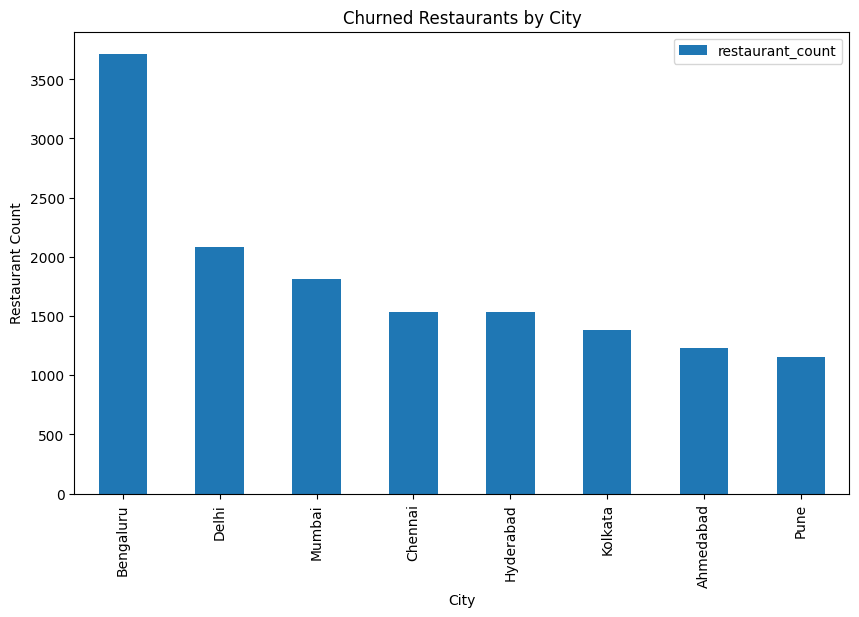

In [121]:
df_city_churn_restaurant=df_churn_restaurants.groupby('city')['restaurant_id'].count().sort_values(ascending=False).reset_index()
df_city_churn_restaurant.rename(columns={'restaurant_id': 'restaurant_count'}, inplace=True)
df_city_churn_restaurant.plot(kind='bar', x='city', y='restaurant_count', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.title('Churned Restaurants by City')

## **High Order Volume Restaurant Churn**

In [122]:
df_churn_orders=df_churn_restaurants.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)
display('High Order Volume Restaurant Churn')
df_churn_orders[df_churn_orders>15]

'High Order Volume Restaurant Churn'

,order_id
restaurant_name,
Punjabi Curry Delight,34
Royal House Palace,33
Fresh Pizza Bhojanalay,29
Delhi Cafe Clouds,29
Hot & Crispy Thali Bhojanalay,29
...,...
Fresh Mess Point,16
Tandoori Delights Stop,16
Hot & Crispy Kitchen Hub,16
